In [1]:
%run "..\Startup_py3.py"
sys.path.append(r"..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

65500


In [2]:
import tifffile

In [4]:
data_folder = r'\\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonclear_adaptors'
folders, fovs = ia.io_tools.data.get_folders(data_folder)
ref_id = 0
ref_folder = folders[ref_id]
print(ref_folder)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 12
- Number of field of views: 161
\\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonclear_adaptors\H0M1


In [112]:
correction_folder = r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50'

segmentation_folder = r'D:\Test_Segmentation'#os.path.join(data_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    print(f"Create segmentation_folder: {segmentation_folder}")
    os.makedirs(segmentation_folder)
else:
    print(f"Use segmentation_folder: {segmentation_folder}")

segmentation_figure_folder = os.path.join(segmentation_folder, 'Figures')
if not os.path.exists(segmentation_figure_folder):
    print(f"Create segmentation_figure_folder: {segmentation_figure_folder}")
    os.makedirs(segmentation_figure_folder)
else:
    print(f"Use segmentation_figure_folder: {segmentation_figure_folder}")
from ImageAnalysis3.figure_tools import plot_segmentation    
    
from ImageAnalysis3.segmentation_tools import cell  
pixel_sizes = [250,108,108]
single_im_size = [50,2048,2048]


Use segmentation_folder: D:\Test_Segmentation
Create segmentation_figure_folder: D:\Test_Segmentation\Figures


In [107]:
sel_fov_id = 5
dapi_filename = os.path.join(data_folder, folders[0], fovs[sel_fov_id])
polyt_filename = os.path.join(data_folder, folders[-1], fovs[sel_fov_id])
print(dapi_filename, polyt_filename)

\\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_005.dax \\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonclear_adaptors\H11M12\Conv_zscan_005.dax


In [108]:
# load image
_ref_drift_im, _dapi_im = ia.io_tools.load.correct_fov_image(
    dapi_filename, [561,405],
    single_im_size=[50,2048,2048],
    num_empty_frames=0, num_buffer_frames=0,
    drift_channel='561',
    all_channels=[750,647,561,405],
    calculate_drift=False, 
    correction_folder=correction_folder,
    chromatic_corr=False,
    illumination_corr=True, hot_pixel_corr=True,
    )[0]
# load image
_polyt_im = ia.io_tools.load.correct_fov_image(
    polyt_filename, [750],
    single_im_size=[13,2048,2048],
    num_empty_frames=0, num_buffer_frames=0,
    drift_channel='561', 
    all_channels=[750,647,561],
    calculate_drift=True, ref_filename=_ref_drift_im[0::4],
    correction_folder=correction_folder,
    chromatic_corr=False,
    illumination_corr=True, hot_pixel_corr=True,
    )[0]

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_005.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_005.dax  in 5.149s
-- removing hot pixels for channels:['750', '647', '561', '405'] in 20.073s
-- bleedthrough correction for channels: ['750', '647', '561'] in 21.026s
-- illumination correction for channels: 750, 647, 561, 405, in 6.440s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 54.776s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20220329-P_brain_M1_nonc

In [109]:
def rescale(_im):
    _new_im = (_im - np.min(_im)) / (np.max(_im) - np.min(_im))
    return _new_im

_final_dapi = rescale(_dapi_im[0::4])
_final_polyt = rescale(_polyt_im[0])


<IPython.core.display.Javascript object>


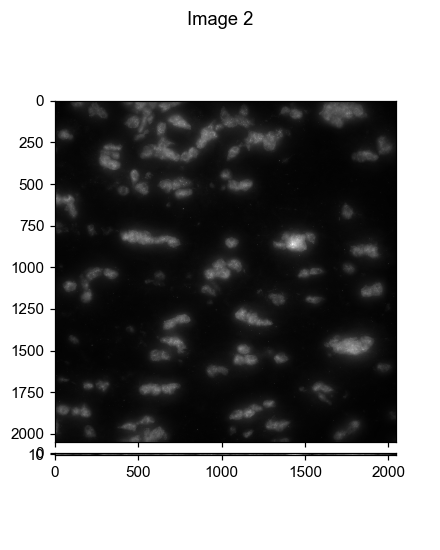

In [110]:
visual_tools.imshow_mark_3d_v2([_final_dapi, _final_polyt])

In [113]:


zero_im = np.zeros(np.shape(_final_polyt))
ImStack = np.stack([zero_im, _final_polyt, _final_dapi], axis=3)

SaveFilename = os.path.join(segmentation_folder, 
                            f"{fovs[sel_fov_id].replace('.dax','_PolytDapiStack.tiff')}")
tifffile.imsave(SaveFilename, ImStack)

In [115]:
ImStack.shape

(13, 2048, 2048, 3)

In [117]:
for _i, _layer in enumerate(ImStack):
    LayerSaveFilename = os.path.join(segmentation_folder, 
                            f"{fovs[sel_fov_id].replace('.dax', '_PolytDapiStack')}_layer{_i}.tiff")
    tifffile.imsave(LayerSaveFilename, _layer)
    

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

<IPython.core.display.Javascript object>


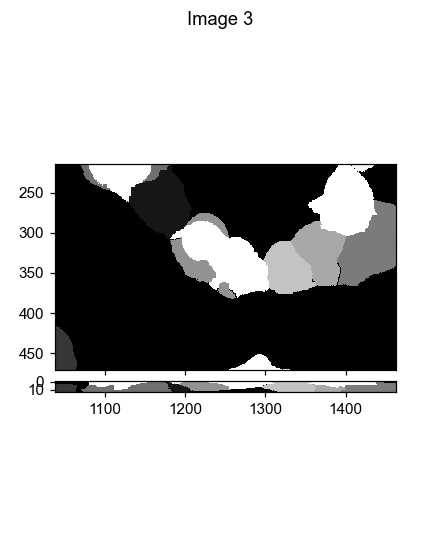

In [129]:
visual_tools.imshow_mark_3d_v2([_dapi_im[0::4], _polyt_im[0], _seg_label.transpose((0,2,1))])

In [118]:
merlin_segmentation_folder = r'\\mendel\Mendel_SSD3\MERFISH_Analysis\20220329-M1_renamed\CellPoseSegment\features'

In [124]:
with h5py.File(os.path.join(merlin_segmentation_folder, f"feature_data_{sel_fov_id}.hdf5"), 'r') as _f:
    _seg_label = _f['labeldata']['label3D'][:]

In [ ]:
seg_label = 

use:
    dameter=40
    
    flow_threshold=-0.4
    
    cellprob_threshold=1
    
    model=TN1
    
    z-aspect=9.26

In [89]:
def rescale(_im):
    _new_im = (_im - np.min(_im)) / (np.max(_im) - np.min(_im))
    return _new_im
    _new_im = _new_im / np.mean(_new_im) * 0.5
    print(np.mean(_new_im))
    _new_im = 1 - 1 / (1+_new_im)
    _new_im = (_new_im - np.min(_new_im)) / (np.max(_new_im) - np.min(_new_im))
    return _new_im